In [1]:
## AE Bottleneck Experiment Notebook
# 1. Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/processed/cleaned.csv'

Mounted at /content/drive


In [2]:
# 2. Load Processed Data
import pandas as pd

#load cleaned data
cleaned_df = pd.read_csv(data_path)
print(f'Loaded cleaned data: {cleaned_df.shape[0]} rows, {cleaned_df.shape[1]} columns')

# get a small sample for training model
df = cleaned_df.sample(frac=0.1, random_state=42)
print(f'Sampled data: {df.shape[0]} rows, {df.shape[1]} columns')

Loaded cleaned data: 640788 rows, 178 columns
Sampled data: 64079 rows, 178 columns


In [3]:
# 3. Train/Test Split
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop(columns='label')
y = df['label']

# First split off a mixed test set (normal+anomaly), stratified to keep the same
#    anomaly ratio in train and test.
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# From the remaining (X_temp / y_temp) we only train on the normal samples:
#    i.e. drop the anomalies from this “train+val pool”
X_train_val = X_temp[y_temp == 0]

# Finally split that normal‐only pool into X_train / X_val
X_train, X_val = train_test_split(
    X_train_val,
    test_size=0.2,
    random_state=42
)

# Now:
#  - X_train, X_val are both *only* normal samples (for AE/VAE training & early stopping)
#  - X_test / y_test is your held‐out mixed set (with both normal and anomalous),
#    and it never overlaps with X_train or X_val

In [4]:
!mkdir -p /content/src/models

In [5]:
import sys
sys.path.append('/content/src')
from models.ae_model import build_ae, train_autoencoder, plot_training_history
from models.ae_evaluation import evaluate_anomaly_detection, visualize_reconstruction, compute_reconstruction_error


=== Training AE with bottleneck_dim=4 ===
Epoch 1/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1459 - mae: 0.2354

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.1450 - mae: 0.2343 - val_loss: 0.0027 - val_mae: 0.0155 - learning_rate: 0.0010
Epoch 2/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048 - mae: 0.0311

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0048 - mae: 0.0311 - val_loss: 0.0024 - val_mae: 0.0099 - learning_rate: 0.0010
Epoch 3/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mae: 0.0141

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0032 - mae: 0.0141 - val_loss: 0.0023 - val_mae: 0.0094 - learning_rate: 0.0010
Epoch 4/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mae: 0.0126

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0030 - mae: 0.0126 - val_loss: 0.0022 - val_mae: 0.0093 - learning_rate: 0.0010
Epoch 5/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mae: 0.0123

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0029 - mae: 0.0123 - val_loss: 0.0021 - val_mae: 0.0092 - learning_rate: 0.0010
Epoch 6/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mae: 0.0122

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0027 - mae: 0.0122 - val_loss: 0.0019 - val_mae: 0.0090 - learning_rate: 0.0010
Epoch 7/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mae: 0.0120

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0026 - mae: 0.0120 - val_loss: 0.0019 - val_mae: 0.0089 - learning_rate: 0.0010
Epoch 8/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mae: 0.0119

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0025 - mae: 0.0119 - val_loss: 0.0018 - val_mae: 0.0087 - learning_rate: 0.0010
Epoch 9/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mae: 0.0118

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0024 - mae: 0.0118 - val_loss: 0.0018 - val_mae: 0.0086 - learning_rate: 0.0010
Epoch 10/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mae: 0.0118

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0024 - mae: 0.0118 - val_loss: 0.0018 - val_mae: 0.0087 - learning_rate: 0.0010
Epoch 11/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mae: 0.0117

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0023 - mae: 0.0117 - val_loss: 0.0017 - val_mae: 0.0085 - learning_rate: 0.0010
Epoch 12/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0114

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0022 - mae: 0.0114 - val_loss: 0.0017 - val_mae: 0.0085 - learning_rate: 0.0010
Epoch 13/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0112

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0022 - mae: 0.0112 - val_loss: 0.0016 - val_mae: 0.0083 - learning_rate: 0.0010
Epoch 14/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mae: 0.0111

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0021 - mae: 0.0111 - val_loss: 0.0015 - val_mae: 0.0079 - learning_rate: 0.0010
Epoch 15/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - mae: 0.0109

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0021 - mae: 0.0109 - val_loss: 0.0015 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 16/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0108

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0020 - mae: 0.0108 - val_loss: 0.0015 - val_mae: 0.0079 - learning_rate: 0.0010
Epoch 17/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0109

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0020 - mae: 0.0109 - val_loss: 0.0014 - val_mae: 0.0079 - learning_rate: 0.0010
Epoch 18/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0019 - mae: 0.0107 - val_loss: 0.0013 - val_mae: 0.0078 - learning_rate: 0.0010
Epoch 19/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mae: 0.0106

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0019 - mae: 0.0106 - val_loss: 0.0013 - val_mae: 0.0075 - learning_rate: 0.0010
Epoch 20/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0105 - val_loss: 0.0013 - val_mae: 0.0076 - learning_rate: 0.0010
Epoch 21/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0104
Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0018 - mae: 0.0104 - val_loss: 0.0013 - val_mae: 0.0074 - learning_rate: 0.0010
Epoch 22/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0101

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0101 - val_loss: 0.0013 - val_mae: 0.0069 - learning_rate: 5.0000e-04
Epoch 23/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0101 - val_loss: 0.0013 - val_mae: 0.0073 - learning_rate: 5.0000e-04
Epoch 24/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0102
Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0018 - mae: 0.0102 - val_loss: 0.0013 - val_mae: 0.0070 - learning_rate: 5.0000e-04
Epoch 25/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0100 - val_loss: 0.0013 - val_mae: 0.0069 - learning_rate: 2.5000e-04
Epoch 26/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0100 - val_loss: 0.0013 - val_mae: 0.0070 - learning_rate: 2.5000e-04
Epoch 27/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mae: 0.0100


Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0018 - mae: 0.0100 - val_loss: 0.0013 - val_mae: 0.0068 - learning_rate: 2.5000e-04
Epoch 28/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0013 - val_mae: 0.0068 - learning_rate: 1.2500e-04
Epoch 29/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0013 - val_mae: 0.0068 - learning_rate: 1.2500e-04
Epoch 30/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0099


Epoch 30: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0013 - val_mae: 0.0067 - learning_rate: 1.2500e-04
Epoch 31/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0017 - mae: 0.0098 - val_loss: 0.0013 - val_mae: 0.0068 - learning_rate: 6.2500e-05
Epoch 32/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0013 - val_mae: 0.0068 - learning_rate: 6.2500e-05
Epoch 33/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0099
Epoch 33: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0013 - val_mae: 0.0068 - learning_rate: 6.2500e-05
Epoch 34/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0100 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 3.1250e-05
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0017 - mae: 0.0098 - val_loss: 0.0013 - val_mae: 0.0068 - learning_rate: 3.1250e-05
Epoch 36/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 3.1250e-05
Epoch 37/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mae: 0.0099


Epoch 37: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 3.1250e-05
Epoch 38/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 1.5625e-05
Epoch 39/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 1.5625e-05
Epoch 40/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0099
Epoch 40: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 1.5625e-05
Epoch 41/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0013 - val_mae: 0.0067 - learning_rate: 7.8125e-06
Epoch 42/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 7.8125e-06
Epoch 43/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0099
Epoch 43: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 7.8125e-06
Epoch 44/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0017 - mae: 0.0098 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 3.9063e-06
Epoch 45/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0098

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0017 - mae: 0.0098 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 3.9063e-06
Epoch 46/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0099
Epoch 46: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 3.9063e-06
Epoch 47/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 1.9531e-06
Epoch 48/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 1.9531e-06
Epoch 49/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0099
Epoch 49: ReduceLROnPlateau reducing learning rate to 1e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0018 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0067 - learning_rate: 1.953

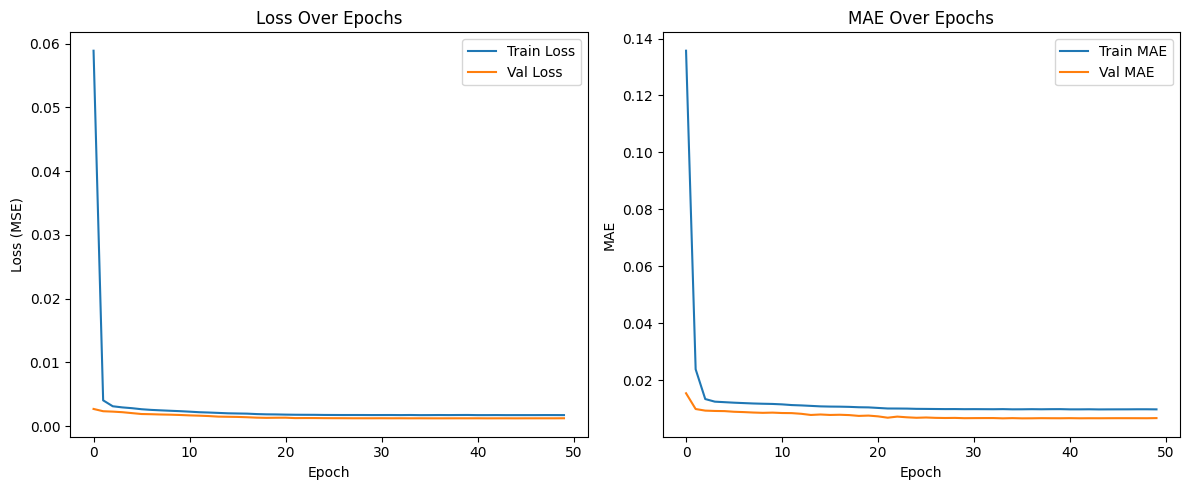

✅ Training plot saved as: ae_bottleneck4_training.png

Evaluation for bottleneck_dim=4
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


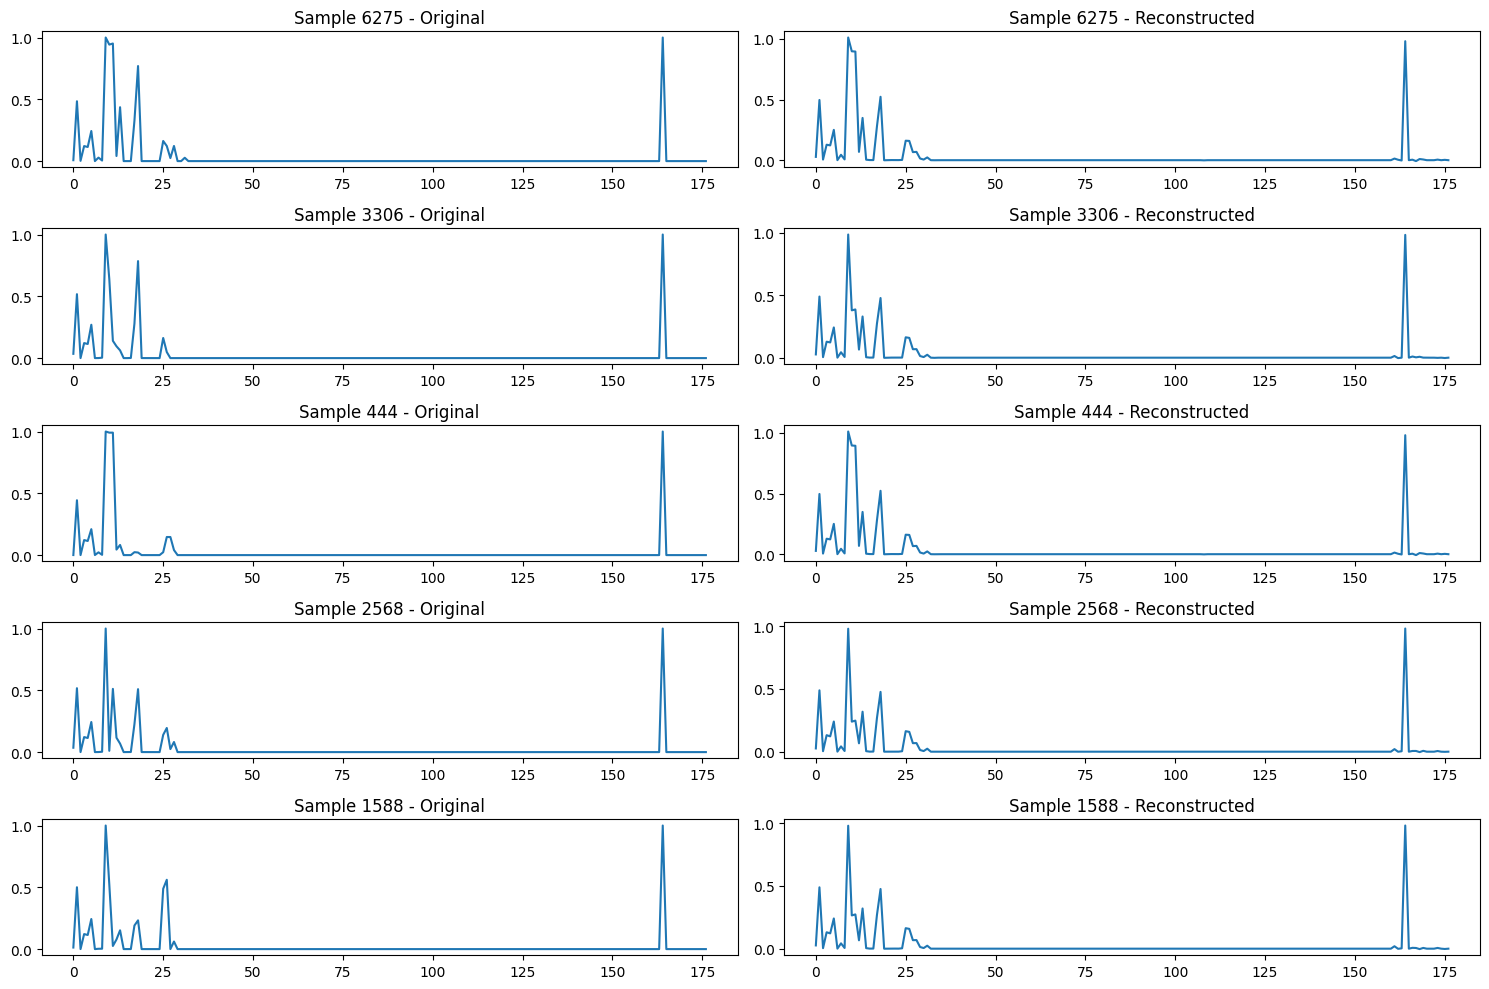


=== Training AE with bottleneck_dim=8 ===
Epoch 1/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1590 - mae: 0.2485

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.1582 - mae: 0.2476 - val_loss: 0.0027 - val_mae: 0.0146 - learning_rate: 0.0010
Epoch 2/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mae: 0.0270

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0043 - mae: 0.0269 - val_loss: 0.0021 - val_mae: 0.0100 - learning_rate: 0.0010
Epoch 3/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mae: 0.0137

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0031 - mae: 0.0137 - val_loss: 0.0019 - val_mae: 0.0093 - learning_rate: 0.0010
Epoch 4/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mae: 0.0127

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0028 - mae: 0.0127 - val_loss: 0.0018 - val_mae: 0.0090 - learning_rate: 0.0010
Epoch 5/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mae: 0.0123

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0026 - mae: 0.0123 - val_loss: 0.0016 - val_mae: 0.0085 - learning_rate: 0.0010
Epoch 6/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mae: 0.0120

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0025 - mae: 0.0120 - val_loss: 0.0016 - val_mae: 0.0087 - learning_rate: 0.0010
Epoch 7/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mae: 0.0118

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0023 - mae: 0.0118 - val_loss: 0.0014 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 8/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0117

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0022 - mae: 0.0117 - val_loss: 0.0013 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 9/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mae: 0.0114

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0021 - mae: 0.0114 - val_loss: 0.0013 - val_mae: 0.0078 - learning_rate: 0.0010
Epoch 10/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - mae: 0.0113

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0020 - mae: 0.0113 - val_loss: 0.0012 - val_mae: 0.0078 - learning_rate: 0.0010
Epoch 11/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mae: 0.0111

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0019 - mae: 0.0111 - val_loss: 0.0011 - val_mae: 0.0073 - learning_rate: 0.0010
Epoch 12/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0109

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018 - mae: 0.0109 - val_loss: 0.0010 - val_mae: 0.0074 - learning_rate: 0.0010
Epoch 13/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0017 - mae: 0.0107 - val_loss: 9.2906e-04 - val_mae: 0.0069 - learning_rate: 0.0010
Epoch 14/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - mae: 0.0105

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0016 - mae: 0.0105 - val_loss: 8.0291e-04 - val_mae: 0.0065 - learning_rate: 0.0010
Epoch 15/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0015 - mae: 0.0102 - val_loss: 7.7360e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 16/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0015 - mae: 0.0100 - val_loss: 7.0438e-04 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 17/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 6.8459e-04 - val_mae: 0.0060 - learning_rate: 0.0010
Epoch 18/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 6.5310e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 19/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - mae: 0.0098 - val_loss: 6.5887e-04 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 20/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0097


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0013 - mae: 0.0097 - val_loss: 6.1455e-04 - val_mae: 0.0056 - learning_rate: 0.0010
Epoch 21/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0013 - mae: 0.0094 - val_loss: 5.8882e-04 - val_mae: 0.0053 - learning_rate: 5.0000e-04
Epoch 22/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0013 - mae: 0.0094 - val_loss: 5.7327e-04 - val_mae: 0.0054 - learning_rate: 5.0000e-04
Epoch 23/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0013 - mae: 0.0094 - val_loss: 5.5872e-04 - val_mae: 0.0051 - learning_rate: 5.0000e-04
Epoch 24/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0013 - mae: 0.0093 - val_loss: 5.4589e-04 - val_mae: 0.0051 - learning_rate: 5.0000e-04
Epoch 25/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0093
Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0093 - val_loss: 5.7601e-04 - val_mae: 0.0055 - learning_rate: 5.0000e-04
Epoch 26/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0013 - mae: 0.0093 - val_loss: 5.2640e-04 - val_mae: 0.0048 - learning_rate: 2.5000e-04
Epoch 27/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0013 - mae: 0.0092 - val_loss: 5.3679e-04 - val_mae: 0.0049 - learning_rate: 2.5000e-04
Epoch 28/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0091


Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 5.2304e-04 - val_mae: 0.0049 - learning_rate: 2.5000e-04
Epoch 29/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 5.1981e-04 - val_mae: 0.0048 - learning_rate: 1.2500e-04
Epoch 30/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 5.2334e-04 - val_mae: 0.0047 - learning_rate: 1.2500e-04
Epoch 31/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0090
Epoch 31: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 5.2038e-04 - val_mae: 0.0048 - learning_rate: 1.2500e-04
Epoch 32/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 5.1051e-04 - val_mae: 0.0047 - learning_rate: 6.2500e-05
Epoch 33/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 5.1178e-04 - val_mae: 0.0047 - learning_rate: 6.2500e-05
Epoch 34/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0090
Epoch 34: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 5.1536e-04 - val_mae: 0.0048 - learning_rate: 6.2500e-05
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 5.1216e-04 - val_mae: 0.0047 - learning_rate: 3.1250e-05
Epoch 36/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 5.1796e-04 - val_mae: 0.0047 - learning_rate: 3.1250e-05
Epoch 37/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089
Epoch 37: ReduceLROnPla

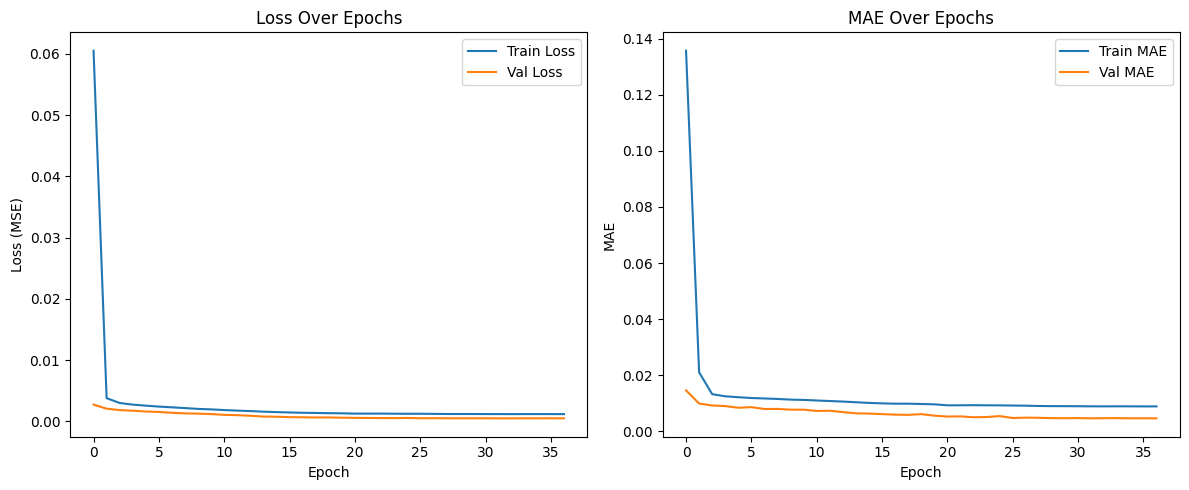

✅ Training plot saved as: ae_bottleneck8_training.png

Evaluation for bottleneck_dim=8
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


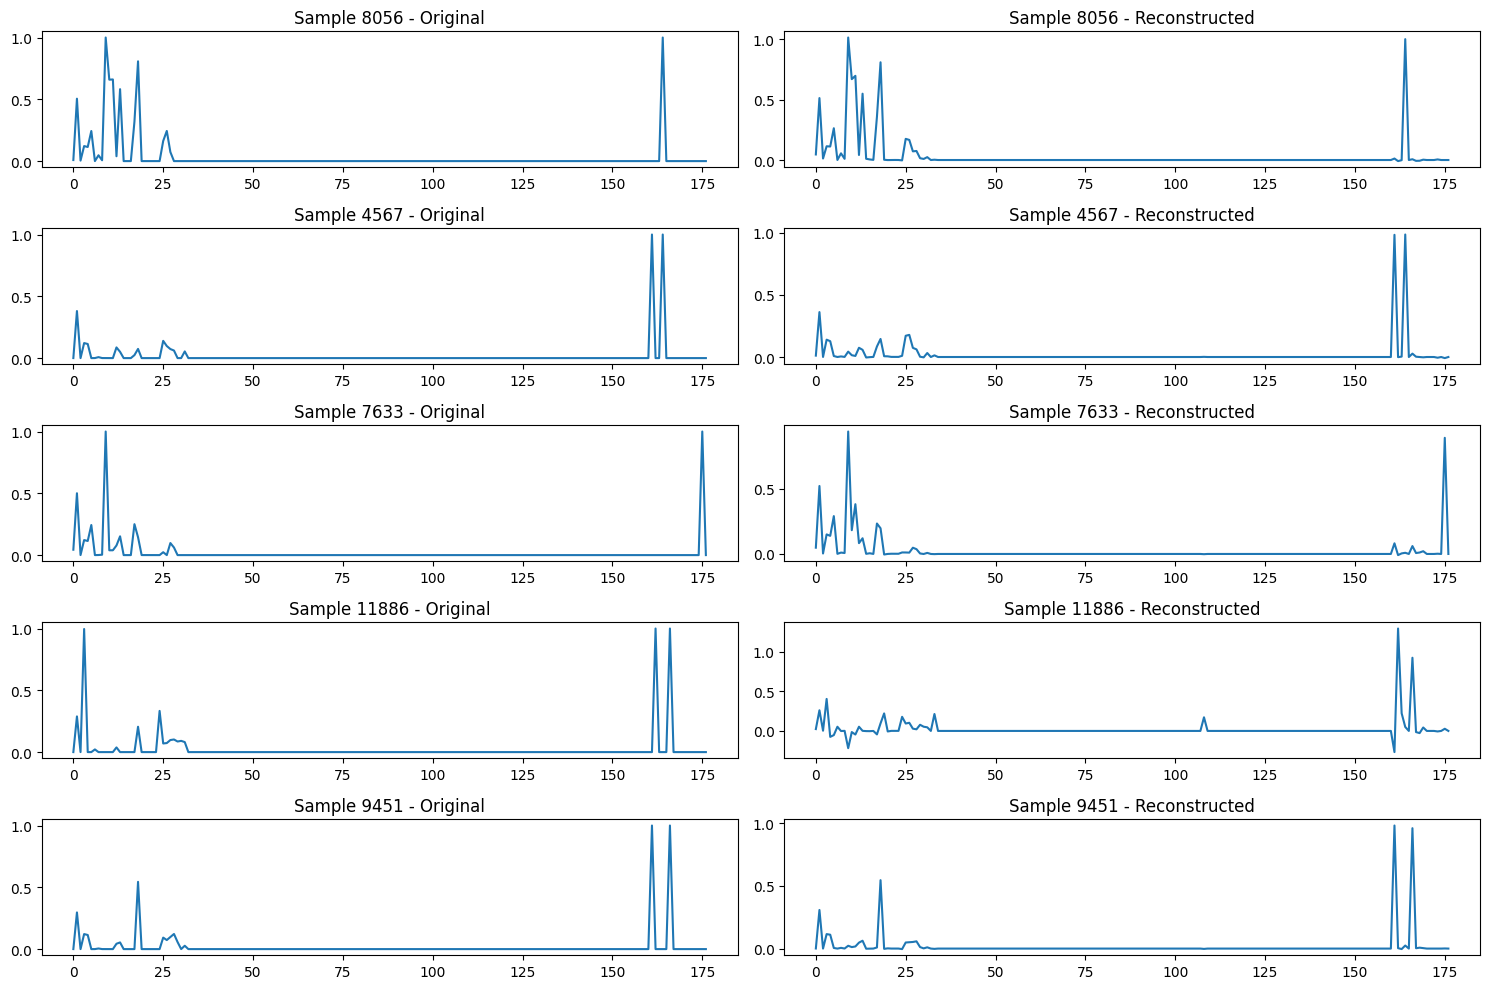


=== Training AE with bottleneck_dim=16 ===
Epoch 1/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1669 - mae: 0.2508

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1659 - mae: 0.2497 - val_loss: 0.0026 - val_mae: 0.0153 - learning_rate: 0.0010
Epoch 2/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mae: 0.0284

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0046 - mae: 0.0284 - val_loss: 0.0019 - val_mae: 0.0093 - learning_rate: 0.0010
Epoch 3/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mae: 0.0135

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0029 - mae: 0.0135 - val_loss: 0.0018 - val_mae: 0.0087 - learning_rate: 0.0010
Epoch 4/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mae: 0.0122

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0027 - mae: 0.0122 - val_loss: 0.0017 - val_mae: 0.0083 - learning_rate: 0.0010
Epoch 5/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mae: 0.0119

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0025 - mae: 0.0119 - val_loss: 0.0016 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 6/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mae: 0.0116

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0023 - mae: 0.0116 - val_loss: 0.0014 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 7/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - mae: 0.0115

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0022 - mae: 0.0115 - val_loss: 0.0014 - val_mae: 0.0074 - learning_rate: 0.0010
Epoch 8/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mae: 0.0114

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0022 - mae: 0.0114 - val_loss: 0.0012 - val_mae: 0.0076 - learning_rate: 0.0010
Epoch 9/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0112

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0020 - mae: 0.0112 - val_loss: 0.0011 - val_mae: 0.0074 - learning_rate: 0.0010
Epoch 10/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - mae: 0.0109

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0019 - mae: 0.0109 - val_loss: 9.4335e-04 - val_mae: 0.0070 - learning_rate: 0.0010
Epoch 11/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0017 - mae: 0.0107 - val_loss: 8.3896e-04 - val_mae: 0.0066 - learning_rate: 0.0010
Epoch 12/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mae: 0.0105

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0016 - mae: 0.0105 - val_loss: 7.7728e-04 - val_mae: 0.0065 - learning_rate: 0.0010
Epoch 13/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0103

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0015 - mae: 0.0103 - val_loss: 6.9906e-04 - val_mae: 0.0060 - learning_rate: 0.0010
Epoch 14/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0101

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0015 - mae: 0.0101 - val_loss: 6.5233e-04 - val_mae: 0.0061 - learning_rate: 0.0010
Epoch 15/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 5.9128e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 16/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0098

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0014 - mae: 0.0098 - val_loss: 5.7480e-04 - val_mae: 0.0056 - learning_rate: 0.0010
Epoch 17/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 5.4096e-04 - val_mae: 0.0055 - learning_rate: 0.0010
Epoch 18/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0096
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 5.8605e-04 - val_mae: 0.0057 - learning_rate: 0.0010
Epoch 19/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 5.1542e-04 - val_mae: 0.0050 - learning_rate: 5.0000e-04
Epoch 20/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0092 - val_loss: 5.2464e-04 - val_mae: 0.0051 - learning_rate: 5.0000e-04
Epoch 21/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0091


Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.9997e-04 - val_mae: 0.0048 - learning_rate: 5.0000e-04
Epoch 22/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 5.1251e-04 - val_mae: 0.0050 - learning_rate: 2.5000e-04
Epoch 23/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.9409e-04 - val_mae: 0.0046 - learning_rate: 2.5000e-04
Epoch 24/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0089
Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.9628e-04 - val_mae: 0.0047 - learning_rate: 2.5000e-04
Epoch 25/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.8305e-04 - val_mae: 0.0045 - learning_rate: 1.2500e-04
Epoch 26/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.8471e-04 - val_mae: 0.0046 - learning_rate: 1.2500e-04
Epoch 27/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.8234e-04 - val_mae: 0.0045 - learning_rate: 1.2500e-04
Epoch 28/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0090


Epoch 28: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.7859e-04 - val_mae: 0.0046 - learning_rate: 1.2500e-04
Epoch 29/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7722e-04 - val_mae: 0.0045 - learning_rate: 6.2500e-05
Epoch 30/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7740e-04 - val_mae: 0.0045 - learning_rate: 6.2500e-05
Epoch 31/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088
Epoch 31: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7740e-04 - val_mae: 0.0045 - learning_rate: 6.2500e-05
Epoch 32/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7690e-04 - val_mae: 0.0044 - learning_rate: 3.1250e-05
Epoch 33/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7565e-04 - val_mae: 0.0044 - learning_rate: 3.1250e-05
Epoch 34/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0087


Epoch 34: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7447e-04 - val_mae: 0.0044 - learning_rate: 3.1250e-05
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7541e-04 - val_mae: 0.0044 - learning_rate: 1.5625e-05
Epoch 36/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7375e-04 - val_mae: 0.0044 - learning_rate: 1.5625e-05
Epoch 37/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0087
Epoch 37: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7455e-04 - val_mae: 0.0044 - learning_rate: 1.5625e-05
Epoch 38/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7724e-04 - val_mae: 0.0044 - learning_rate: 7.8125e-06
Epoch 39/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7535e-04 - val_mae: 0.0044 - learning_rate: 7.8125e-06
Epoch 40/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088


Epoch 40: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7297e-04 - val_mae: 0.0044 - learning_rate: 7.8125e-06
Epoch 41/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0087

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7283e-04 - val_mae: 0.0044 - learning_rate: 3.9063e-06
Epoch 42/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7329e-04 - val_mae: 0.0044 - learning_rate: 3.9063e-06
Epoch 43/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0087
Epoch 43: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7493e-04 - val_mae: 0.0044 - learning_rate: 3.9063e-06
Epoch 44/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7297e-04 - val_mae: 0.0044 - learning_rate: 1.9531e-06
Epoch 45/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7280e-04 - val_mae: 0.0044 - learning_rate: 1.9531e-06
Epoch 46/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0087
Epoch 46: ReduceLROnPlateau reducing learning rate to 1e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7326e-04 - val_mae: 0.0044 - learning_rate: 1.9531e-06
Epoch 47/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0087

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7248e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06
Epoch 48/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7548e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06
Epoch 49/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7340e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06
Epoch 50/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0087

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7212e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06
Epoch 51/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.7272e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06
Epoch 52/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7366e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06
Epoch 53/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7399e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06
Epoch 54/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.7231e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06
Epoch 55/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.7303e-04 - val_mae: 0.0044 - learning_rate: 1.0000e-06


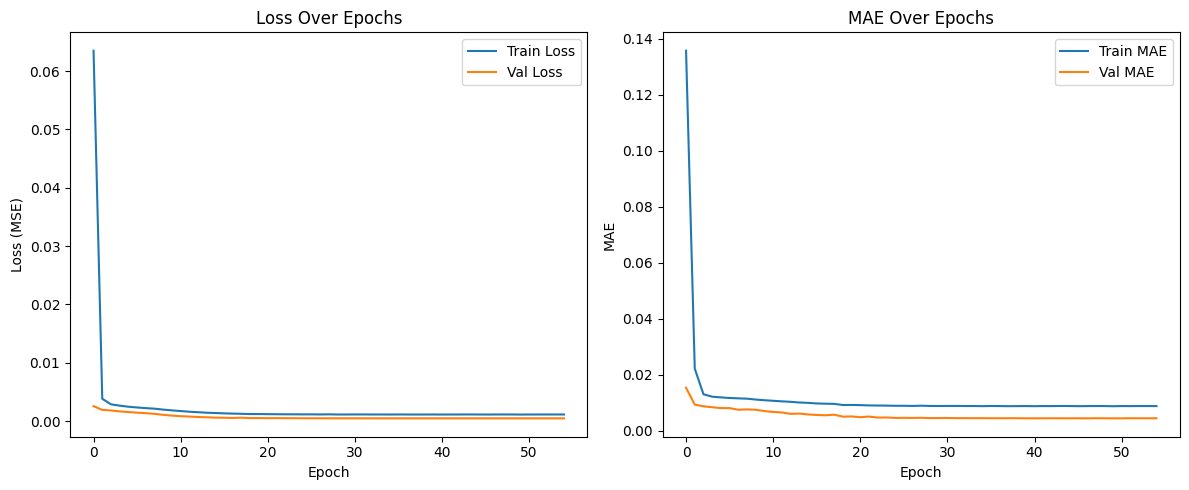

✅ Training plot saved as: ae_bottleneck16_training.png

Evaluation for bottleneck_dim=16
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


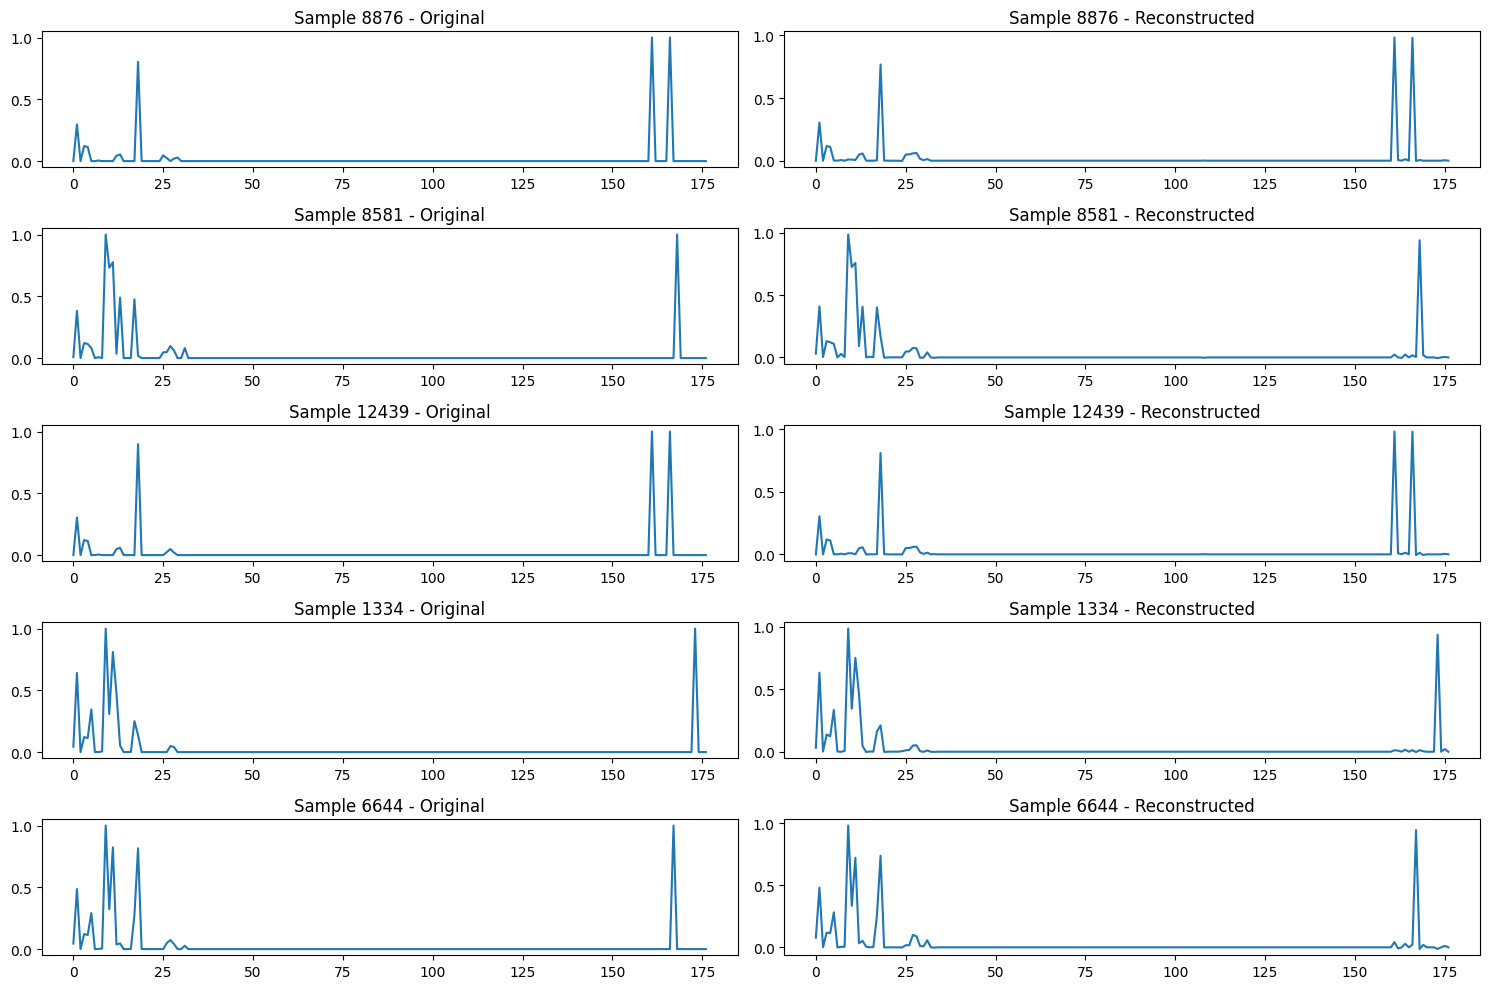


=== Training AE with bottleneck_dim=32 ===
Epoch 1/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1577 - mae: 0.2489

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.1575 - mae: 0.2487 - val_loss: 0.0026 - val_mae: 0.0144 - learning_rate: 0.0010
Epoch 2/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mae: 0.0255

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0040 - mae: 0.0255 - val_loss: 0.0019 - val_mae: 0.0093 - learning_rate: 0.0010
Epoch 3/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mae: 0.0130

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0029 - mae: 0.0130 - val_loss: 0.0016 - val_mae: 0.0083 - learning_rate: 0.0010
Epoch 4/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mae: 0.0121

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0026 - mae: 0.0121 - val_loss: 0.0014 - val_mae: 0.0079 - learning_rate: 0.0010
Epoch 5/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mae: 0.0117

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0024 - mae: 0.0117 - val_loss: 0.0012 - val_mae: 0.0076 - learning_rate: 0.0010
Epoch 6/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - mae: 0.0114

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0022 - mae: 0.0114 - val_loss: 0.0011 - val_mae: 0.0069 - learning_rate: 0.0010
Epoch 7/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0112

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0020 - mae: 0.0112 - val_loss: 9.7880e-04 - val_mae: 0.0067 - learning_rate: 0.0010
Epoch 8/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mae: 0.0110

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0019 - mae: 0.0110 - val_loss: 9.1287e-04 - val_mae: 0.0067 - learning_rate: 0.0010
Epoch 9/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - mae: 0.0108

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0018 - mae: 0.0108 - val_loss: 8.6034e-04 - val_mae: 0.0066 - learning_rate: 0.0010
Epoch 10/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0017 - mae: 0.0107 - val_loss: 8.0621e-04 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 11/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - mae: 0.0104

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0016 - mae: 0.0104 - val_loss: 7.3504e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 12/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0103

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0015 - mae: 0.0103 - val_loss: 6.5091e-04 - val_mae: 0.0060 - learning_rate: 0.0010
Epoch 13/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0015 - mae: 0.0102 - val_loss: 6.1185e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 14/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0014 - mae: 0.0100 - val_loss: 5.7931e-04 - val_mae: 0.0057 - learning_rate: 0.0010
Epoch 15/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0098

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0098 - val_loss: 5.6728e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 16/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0097


Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0097 - val_loss: 5.4980e-04 - val_mae: 0.0057 - learning_rate: 0.0010
Epoch 17/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0094 - val_loss: 5.0983e-04 - val_mae: 0.0049 - learning_rate: 5.0000e-04
Epoch 18/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 5.1088e-04 - val_mae: 0.0053 - learning_rate: 5.0000e-04
Epoch 19/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.9329e-04 - val_mae: 0.0049 - learning_rate: 5.0000e-04
Epoch 20/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0092


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0012 - mae: 0.0092 - val_loss: 4.7573e-04 - val_mae: 0.0049 - learning_rate: 5.0000e-04
Epoch 21/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.5116e-04 - val_mae: 0.0046 - learning_rate: 2.5000e-04
Epoch 22/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.5192e-04 - val_mae: 0.0046 - learning_rate: 2.5000e-04
Epoch 23/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090


Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.3829e-04 - val_mae: 0.0045 - learning_rate: 2.5000e-04
Epoch 24/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.2931e-04 - val_mae: 0.0044 - learning_rate: 1.2500e-04
Epoch 25/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.2302e-04 - val_mae: 0.0043 - learning_rate: 1.2500e-04
Epoch 26/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088


Epoch 26: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.2132e-04 - val_mae: 0.0043 - learning_rate: 1.2500e-04
Epoch 27/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.2104e-04 - val_mae: 0.0042 - learning_rate: 6.2500e-05
Epoch 28/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.2097e-04 - val_mae: 0.0043 - learning_rate: 6.2500e-05
Epoch 29/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - mae: 0.0089


Epoch 29: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.1620e-04 - val_mae: 0.0042 - learning_rate: 6.2500e-05
Epoch 30/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.1616e-04 - val_mae: 0.0042 - learning_rate: 3.1250e-05
Epoch 31/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.1272e-04 - val_mae: 0.0042 - learning_rate: 3.1250e-05
Epoch 32/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089
Epoch 32: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.1567e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 33/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.1338e-04 - val_mae: 0.0042 - learning_rate: 1.5625e-05
Epoch 34/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.1463e-04 - val_mae: 0.0042 - learning_rate: 1.5625e-05
Epoch 35/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088
Epoch 35: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.1373e-04 - va

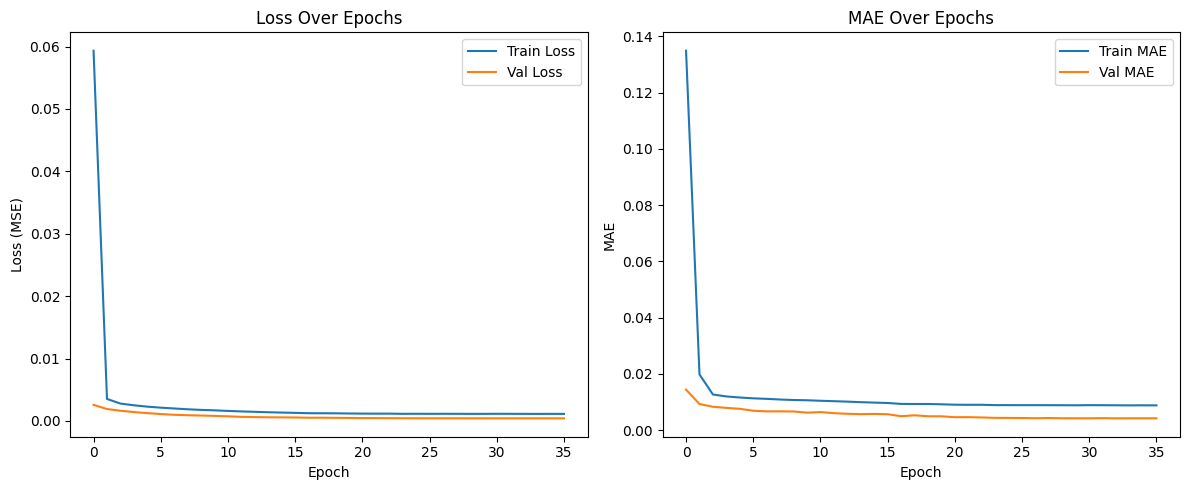

✅ Training plot saved as: ae_bottleneck32_training.png

Evaluation for bottleneck_dim=32
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


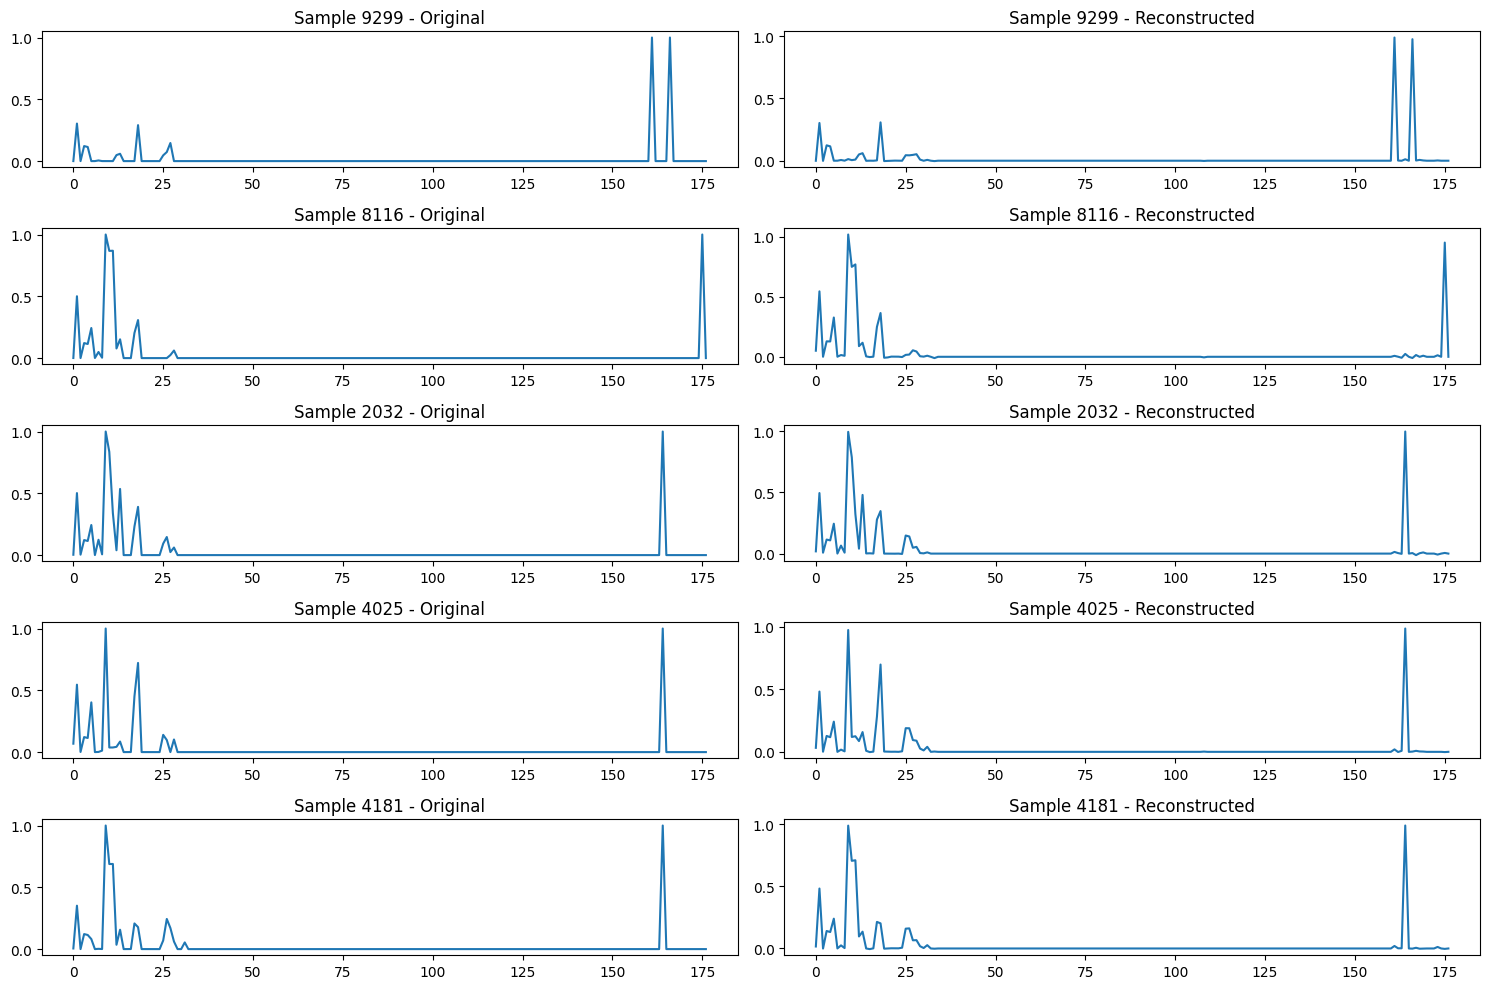


✅ Bottleneck size experiment results saved.


In [6]:
# 4. Bottleneck Size Experiments
bottleneck_dims = [4, 8, 16, 32]
results = {}

for dim in bottleneck_dims:
    print(f"\n=== Training AE with bottleneck_dim={dim} ===")
    ae = build_ae(input_dim=X_train.shape[1], encoding_dim=dim)
    history, model = train_autoencoder(
        ae, X_train, X_val, save_path=f'best_ae_bottleneck{dim}.h5'
    )
    plot_training_history(history, save_path=f'ae_bottleneck{dim}_training.png')

    print(f"\nEvaluation for bottleneck_dim={dim}")
    re = compute_reconstruction_error(model, X_test)
    metrics = evaluate_anomaly_detection(re, y_test)
    results[dim] = metrics
    visualize_reconstruction(model, X_test.to_numpy())

# 5. Save Results
results_df = pd.DataFrame(results).T
results_df.to_csv('bottleneck_experiment_results.csv')
print("\n✅ Bottleneck size experiment results saved.")